In [2]:
import tensorflow as tf
import keras
import matplotlib
import numpy as np

In [3]:
tf.__version__, keras.__version__, matplotlib.__version__, np.__version__

('2.16.1', '3.4.1', '3.7.1', '1.25.2')

In [4]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense, Flatten, Dropout, Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras import utils as np_utils
import matplotlib.pyplot as plt

In [5]:
(X_treinamento, y_treinamento), (X_teste, y_teste) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [6]:
X_treinamento.shape, X_teste.shape

((60000, 28, 28), (10000, 28, 28))

In [7]:
28 * 28

784

In [8]:
X_treinamento, X_treinamento.max()

(array([[[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        ...,
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],

In [9]:
y_treinamento

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

Text(0.5, 1.0, 'Classe 5')

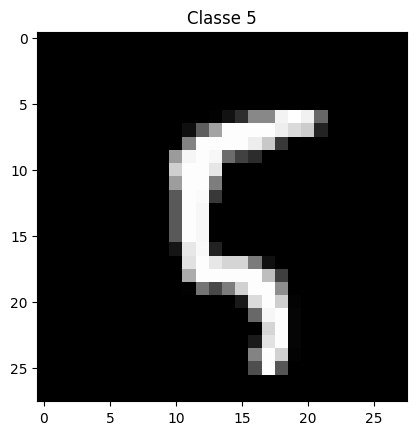

In [10]:
plt.imshow(X_treinamento[100], cmap='gray')
plt.title('Classe ' + str(y_treinamento[100]))

In [11]:
X_treinamento.shape

(60000, 28, 28)

In [12]:
X_treinamento = X_treinamento.reshape(X_treinamento.shape[0], 28, 28, 1)

In [13]:
X_teste = X_teste.reshape(X_teste.shape[0], 28, 28, 1)

In [14]:
X_treinamento.shape, X_teste.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [15]:
X_treinamento = X_treinamento.astype('float32')

In [16]:
X_teste = X_teste.astype('float32')

In [17]:
X_treinamento /= 255
X_teste /= 255

In [18]:
X_treinamento.max(), X_treinamento.min()

(1.0, 0.0)

In [19]:
y_treinamento

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [20]:
y_treinamento = np_utils.to_categorical(y_treinamento, 10)
y_teste = np_utils.to_categorical(y_teste, 10)

In [21]:
y_treinamento

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [22]:
y_treinamento[2]

array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0.])

In [33]:
rede_neural = Sequential()

rede_neural.add(InputLayer(shape=(28, 28, 1)))

rede_neural.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu'))
rede_neural.add(BatchNormalization())
rede_neural.add(MaxPooling2D(pool_size=(2, 2)))

rede_neural.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu'))
rede_neural.add(BatchNormalization())
rede_neural.add(MaxPooling2D(pool_size=(2, 2)))

rede_neural.add(Flatten())

rede_neural.add(Dense(units=128, activation='relu'))
rede_neural.add(Dropout(0.2))
rede_neural.add(Dense(units=128, activation='relu'))
rede_neural.add(Dropout(0.2))
rede_neural.add(Dense(units=10, activation='softmax'))

In [26]:
13 * 13 * 32

5408

In [27]:
(5408 + 10) / 2

2709.0

In [34]:
rede_neural.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_1 (Conv2D)                    │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 26, 26, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 11, 11, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 11, 11, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 5, 5, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 800)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │         102,528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 130,154 (508.41 KB)

 Trainable params: 130,026 (507.91 KB)

 Non-trainable params: 128 (512.00 B)

In [35]:
rede_neural.compile(loss='categorical_crossentropy',
                    optimizer='adam', metrics=['accuracy'])

In [36]:
rede_neural.fit(X_treinamento, y_treinamento, batch_size=128,
                epochs=5, validation_data=(X_teste, y_teste))

Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 61s 125ms/step - accuracy: 0.8569 - loss: 0.4659 - val_accuracy: 0.9748 - val_loss: 0.0894
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 58s 124ms/step - accuracy: 0.9790 - loss: 0.0701 - val_accuracy: 0.9868 - val_loss: 0.0388
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 58s 123ms/step - accuracy: 0.9848 - loss: 0.0494 - val_accuracy: 0.9868 - val_loss: 0.0389
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 83s 125ms/step - accuracy: 0.9886 - loss: 0.0391 - val_accuracy: 0.9904 - val_loss: 0.0313
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 84s 130ms/step - accuracy: 0.9905 - loss: 0.0315 - val_accuracy: 0.9883 - val_loss: 0.0369


In [37]:
resultado = rede_neural.evaluate(X_teste, y_teste)

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.9853 - loss: 0.0438


In [38]:
resultado

[0.036877989768981934, 0.9883000254631042]